## Downloads and Imports

In [ ]:
!pip3 install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
!wget -O GoogleNews-vectors-negative300.bin.gz \
  https://huggingface.co/LoganKilpatrick/GoogleNews-vectors-negative300/resolve/main/GoogleNews-vectors-negative300.bin.gz

!gunzip GoogleNews-vectors-negative300.bin.gz

--2025-06-13 04:00:12--  https://huggingface.co/LoganKilpatrick/GoogleNews-vectors-negative300/resolve/main/GoogleNews-vectors-negative300.bin.gz
Resolving huggingface.co (huggingface.co)... 18.172.134.24, 18.172.134.124, 18.172.134.4, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/b1/89/b189d35444d7ce0d7e26df34136d48e0ea67093c66b4c6ecf41c618c40c33937/21c05ae916a67a4da59b1d006903355cced7de7da1e42bff9f0504198c748da8?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27GoogleNews-vectors-negative300.bin.gz%3B+filename%3D%22GoogleNews-vectors-negative300.bin.gz%22%3B&response-content-type=application%2Fgzip&Expires=1749790812&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0OTc5MDgxMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy9iMS84OS9iMTg5ZDM1NDQ0ZDdjZTBkN2UyNmRmMzQxMzZkNDhlMGVhNjcwOTNjNjZiNGM2ZWNmNDFjN

In [ ]:
from gensim.models import KeyedVectors
import numpy as np
import itertools
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

In [ ]:


model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

#test if the model functions
model.most_similar("engineer")

[('electrical_engineer', 0.7500534653663635),
 ('mechanical_engineer', 0.7456685304641724),
 ('Engineer', 0.6911254525184631),
 ('engineering', 0.6766180396080017),
 ('engineeer', 0.611038863658905),
 ('engineers', 0.6096685528755188),
 ('technician', 0.6021502614021301),
 ('electrician', 0.5883190631866455),
 ('Mechanical_Engineer', 0.5782192945480347),
 ('architect', 0.5779430270195007)]

In [ ]:
target_a = [
    "nurse", "receptionist", "teacher", "librarian",
    "homemaker", "babysitter", "assistant", "maid"
] #stereotypically female associated professions
target_b = [
    "doctor", "engineer", "mechanic", "lawyer",
    "carpenter", "electrician", "pilot", "manager"
] #stereotypically male ssociated professions
attribute_a = ["woman", "female", "she", "her", "hers", "daughter", "mother"] #female terms
attribute_b = ["man", "male", "he", "him", "his", "son", "father"] #male terms

In [ ]:
def filter_vocab(words, model):
    return [w for w in words if w in model]

target_a = filter_vocab(target_a, model)
target_b = filter_vocab(target_b, model)
attribute_a = filter_vocab(attribute_a, model)
attribute_b = filter_vocab(attribute_b, model)

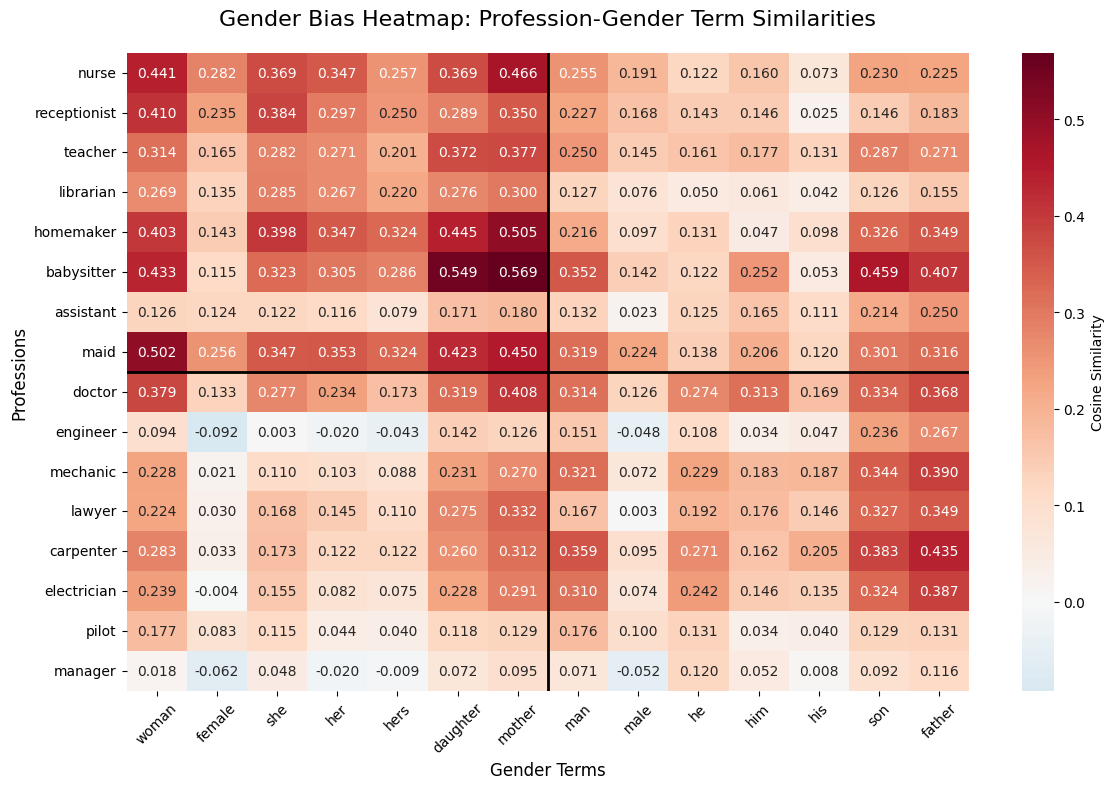

In [ ]:
def create_bias_heatmap(target_a, target_b, attribute_a, attribute_b, model):
    """Create a heatmap showing cosine similarities between professions and gender terms"""
    # Filter available words

    all_targets = target_a + target_b
    all_attributes = attribute_a + attribute_b

    # Calculate similarity matrix
    similarity_matrix = np.zeros((len(all_targets), len(all_attributes)))

    for i, target in enumerate(all_targets):
        for j, attribute in enumerate(all_attributes):
            sim = cosine_similarity(
                model[target].reshape(1, -1),
                model[attribute].reshape(1, -1)
            )[0][0]
            similarity_matrix[i, j] = sim

    # Create heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        similarity_matrix,
        xticklabels=all_attributes,
        yticklabels=all_targets,
        annot=True,
        cmap='RdBu_r',
        center=0,
        fmt='.3f',
        cbar_kws={'label': 'Cosine Similarity'}
    )
    plt.title('Gender Bias Heatmap: Profession-Gender Term Similarities', fontsize=16, pad=20)
    plt.xlabel('Gender Terms', fontsize=12)
    plt.ylabel('Professions', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Add dividing lines to separate female/male categories
    plt.axvline(x=len(attribute_a), color='black', linewidth=2)
    plt.axhline(y=len(target_a), color='black', linewidth=2)

    plt.tight_layout()
    plt.show()


create_bias_heatmap(target_a, target_b, attribute_a, attribute_b, model)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


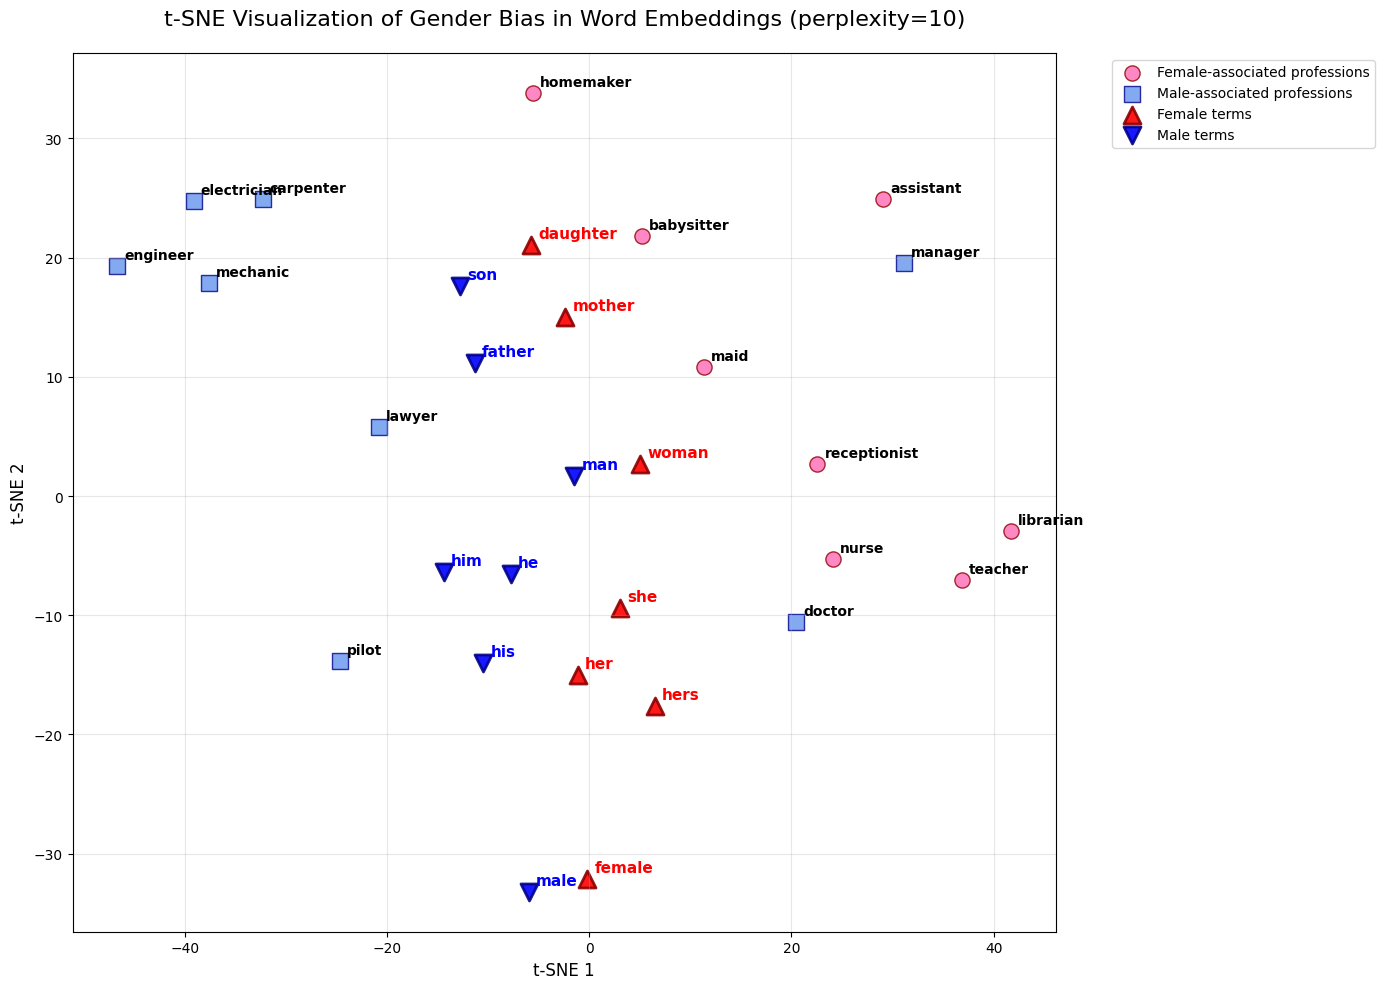

In [ ]:
def create_tsne_visualization(target_a, target_b, attribute_a, attribute_b, model, perplexity=10):
    """Create t-SNE visualization showing word embeddings in 2D space"""
    # Filter available words

    all_words = target_a + target_b + attribute_a + attribute_b

    # Get embeddings
    embeddings = np.array([model[word] for word in all_words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Create visualization
    plt.figure(figsize=(14, 10))

    # Plot different categories with different colors and markers
    start_idx = 0

    # Female-associated professions
    end_idx = start_idx + len(target_a)
    plt.scatter(embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1],
               c='hotpink', marker='o', s=120, label='Female-associated professions',
               alpha=0.8, edgecolors='darkred', linewidth=1)
    for i, word in enumerate(target_a):
        plt.annotate(word, (embeddings_2d[start_idx + i, 0], embeddings_2d[start_idx + i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10, weight='bold')
    start_idx = end_idx

    # Male-associated professions
    end_idx = start_idx + len(target_b)
    plt.scatter(embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1],
               c='cornflowerblue', marker='s', s=120, label='Male-associated professions',
               alpha=0.8, edgecolors='darkblue', linewidth=1)
    for i, word in enumerate(target_b):
        plt.annotate(word, (embeddings_2d[start_idx + i, 0], embeddings_2d[start_idx + i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10, weight='bold')
    start_idx = end_idx

    # Female terms
    end_idx = start_idx + len(attribute_a)
    plt.scatter(embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1],
               c='red', marker='^', s=150, label='Female terms',
               alpha=0.9, edgecolors='darkred', linewidth=2)
    for i, word in enumerate(attribute_a):
        plt.annotate(word, (embeddings_2d[start_idx + i, 0], embeddings_2d[start_idx + i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=11, weight='bold', color='red')
    start_idx = end_idx

    # Male terms
    end_idx = start_idx + len(attribute_b)
    plt.scatter(embeddings_2d[start_idx:end_idx, 0], embeddings_2d[start_idx:end_idx, 1],
               c='blue', marker='v', s=150, label='Male terms',
               alpha=0.9, edgecolors='darkblue', linewidth=2)
    for i, word in enumerate(attribute_b):
        plt.annotate(word, (embeddings_2d[start_idx + i, 0], embeddings_2d[start_idx + i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=11, weight='bold', color='blue')

    plt.title(f't-SNE Visualization of Gender Bias in Word Embeddings (perplexity={perplexity})',
              fontsize=16, pad=20)
    plt.xlabel('t-SNE 1', fontsize=12)
    plt.ylabel('t-SNE 2', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return embeddings_2d

embeddings_2d = create_tsne_visualization(target_a, target_b, attribute_a, attribute_b, model, perplexity=10)

## Word Embedding Association Test (WEAT)
https://arxiv.org/pdf/1608.07187

**Association Score**
$$s(w, A, B) = \text{mean}{a \in A} \cos(\vec{w}, \vec{a}) - \text{mean}{b \in B} \cos(\vec{w}, \vec{b})$$

In [ ]:
def association(w,A,B,model):
  return np.mean([model.similarity(w,a) for a in A]) - np.mean([model.similarity(w,b) for b in B])

**Test Statistic**
$$s(X, Y, A, B) = \sum_{x \in X} s(x, A, B) - \sum_{y \in Y} s(y, A, B)$$

In [ ]:
def weat_test_statistic(X,Y,A,B,model):
  s_x=[association(x,A,B,model) for x in X]
  s_y=[association(y,A,B,model) for y in Y]

  return np.sum(s_x) - np.sum(s_y)


**Effect Size**
$$\frac{\text{mean}{x \in X} s(x,A,B) - \text{mean}{y \in Y} s(y,A,B)}{\text{std-dev}_{w \in X \cup Y} s(w,A,B)}$$

In [ ]:
def effect_size(X,Y,A,B,model):
  all_words=X+Y
  s_all=[association(w,A,B,model) for w in all_words]
  s_x=[association(w,A,B,model) for w in X]
  s_y=[association(w,A,B,model) for w in Y]

  return (np.mean(s_x) - np.mean(s_y)) / np.std(s_all)


**Permutation Test (p-value)**
$$p = \text{Pr}_{(X_i, Y_i)}[s(X_i, Y_i, A, B) > s(X, Y, A, B)]$$

In [ ]:
def permutation_test(X,Y,A,B,model,num_samples=50000):
  combined=X+Y
  observed_stat=weat_test_statistic(X,Y,A,B,model)
  n=len(X)

  if len(combined) <=10:
    #exhasutive perm if size is small
    permutations=list(itertools.combinations(combined,n))
  else:
    #random permutations if size is large
    permutations=[random.sample(combined,n) for _ in range(num_samples)]

  count=0
  for x_i in permutations:
    y_i=list(set(combined) - set(x_i))
    stat_i=weat_test_statistic(list(x_i),list(y_i),A,B,model)
    if stat_i > observed_stat:
      count+=1

  return count/len(permutations)

In [ ]:
stat=weat_test_statistic(target_a,target_b,attribute_a,attribute_b,model)
eff_size=effect_size(target_a,target_b,attribute_a,attribute_b,model)
p_value=permutation_test(target_a,target_b,attribute_a,attribute_b,model)

print(f"WEAT test stat: {stat:.4f}")
print(f"Effect size: {eff_size:.4f}")
print(f"p-value: {p_value:.4f}")

WEAT test stat: 1.4167
Effect size: 1.7208
p-value: 0.0002


### Race bias


In [ ]:
target_a = [
    "Lakisha", "Tanisha", "Latoya", "Kenya", "Latonya", "Shaniqua", "Tamika", "Aisha",
    "Jamal", "Tyrone", "Leroy", "Rasheed", "Tremayne", "DeAndre", "Marquis", "Darnell", "Hakim", "Jermaine"
]

target_b = [
    "Heather", "Melanie", "Katie", "Kristen", "Amber", "Emily", "Lauren", "Brittany",
    "Brad", "Brendan", "Geoffrey", "Greg", "Brett", "Matthew", "Luke", "Connor", "Jack", "Andrew"
]
attribute_b = [
    "love", "happy", "peace", "wonderful", "pleasure", "friend", "laughter", "joy",
    "smile", "sunshine", "sweet", "delight", "cheer", "excellent", "glorious", "amazing", "blessed", "kind"
]
attribute_a = [
    "hate", "angry", "terrible", "horrible", "nasty", "evil", "war", "ugly",
    "pain", "failure", "hurt", "gross", "bad", "disgust", "violence", "abuse", "sad", "annoying"
]

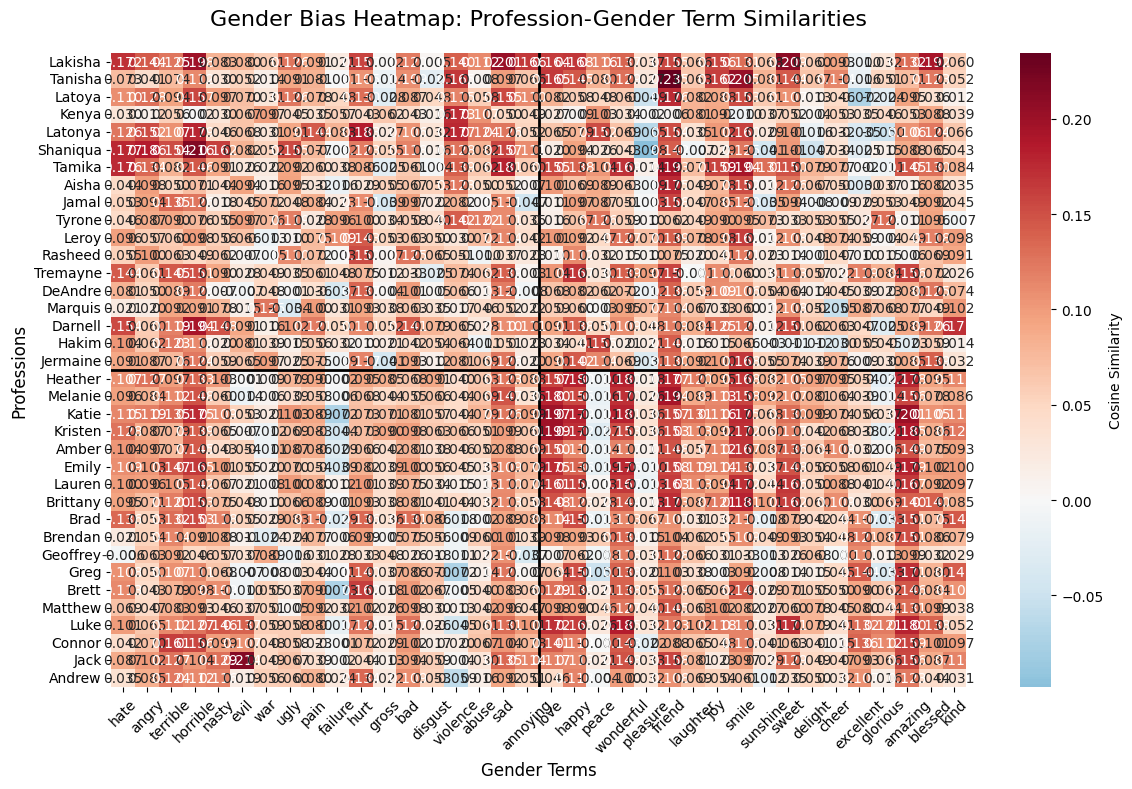

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


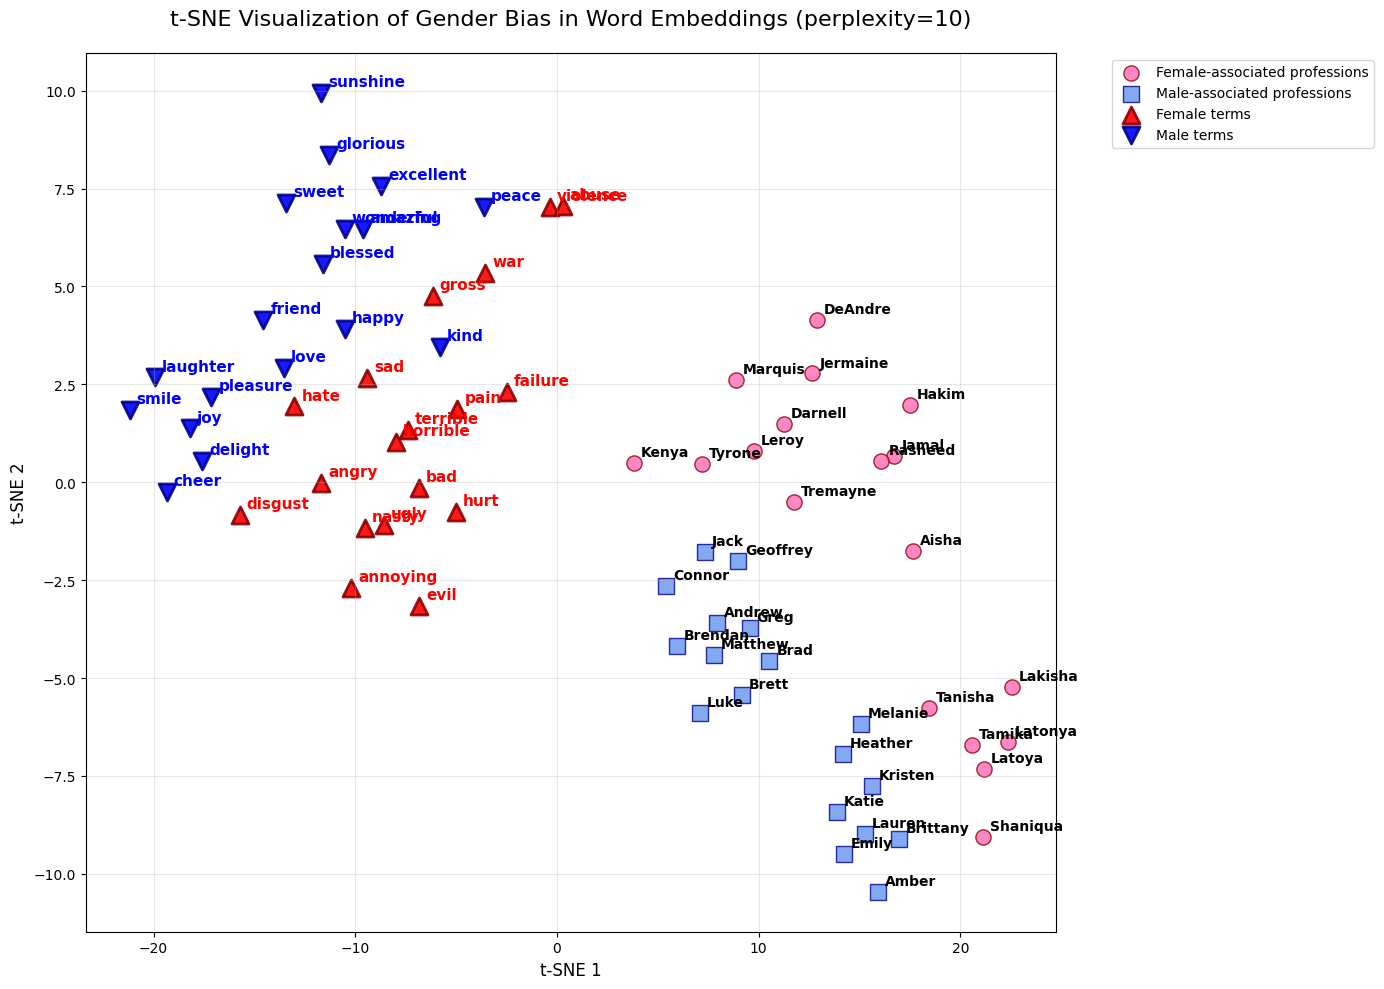

In [ ]:
create_bias_heatmap(target_a, target_b, attribute_a, attribute_b, model)

embeddings_2d = create_tsne_visualization(target_a, target_b, attribute_a, attribute_b, model, perplexity=10)

In [ ]:
stat=weat_test_statistic(target_a,target_b,attribute_a,attribute_b,model)
eff_size=effect_size(target_a,target_b,attribute_a,attribute_b,model)
p_value=permutation_test(target_a,target_b,attribute_a,attribute_b,model)

print(f"WEAT test stat: {stat:.4f}")
print(f"Effect size: {eff_size:.4f}")
print(f"p-value: {p_value:.4f}")

WEAT test stat: 0.4678
Effect size: 1.0063
p-value: 0.0005
